### A1.

#### Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it. Use numpy.fft.ifft() to inverse transform the frequency spectrum to time domain signal

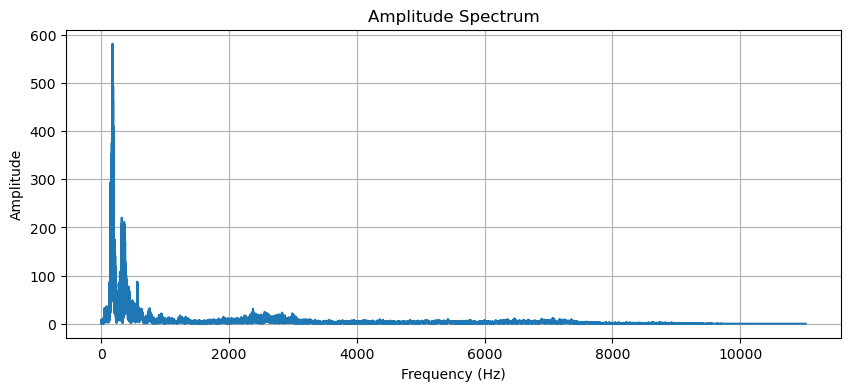

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the audio file
audio_file_lab5 = "AI_VOICE.wav"
y_new, sr_new = librosa.load(audio_file_lab5)

y_new = np.fft.fft(y_new)

plt.figure(figsize=(10, 4))
freqs_new = np.fft.fftfreq(len(y_new), 1/sr_new)
plt.plot(freqs_new[:len(freqs_new)//2], np.abs(y_new)[:len(freqs_new)//2])
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

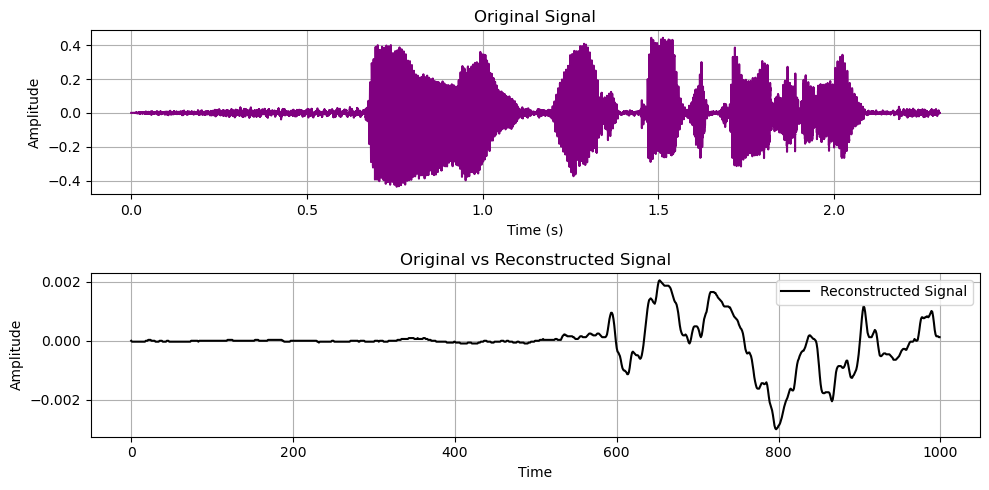

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the audio file
input_audio_file = "AI_VOICE.wav"
audio_data, sample_rate = librosa.load(input_audio_file, sr=None, mono=True, dtype=np.float32)  

# Perform Fourier Transform
audio_fft = np.fft.fft(audio_data)

# Plot the waveform of the original signal 
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
time = np.arange(0, len(audio_data)) / sample_rate
plt.plot(time, audio_data, color='purple')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Compute inverse FFT
reconstructed_audio = np.fft.ifft(audio_fft)

# Plot the reconstructed signal 
plt.subplot(2, 1, 2)
plt.plot(np.real(reconstructed_audio[:1000]), label='Reconstructed Signal', color='black')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original vs Reconstructed Signal')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### A2.

#### Use a rectangular window to select the low frequency components from your spectrum. Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.

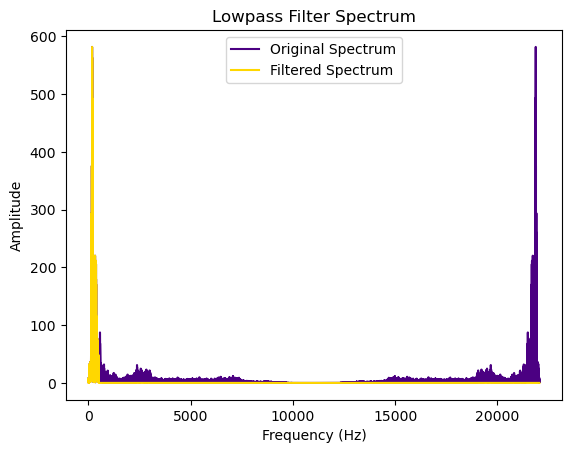

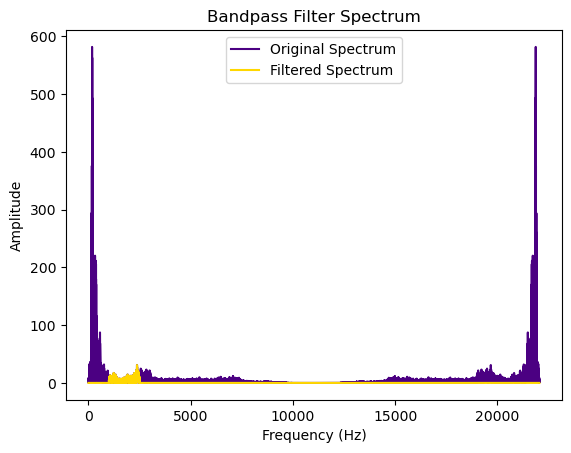

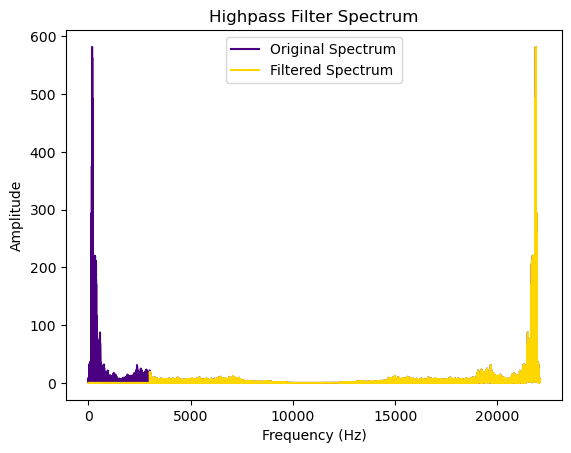

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio as IAudio

speech_custom, sr_custom = librosa.load("AI_VOICE.wav")

fft_custom = np.fft.fft(speech_custom)
length_custom = len(fft_custom)

def custom_filter_and_play(filter_type_custom, cutoff_custom=None):
    window_custom = np.ones(length_custom)
    if filter_type_custom == "lowpass":
        window_custom[int(cutoff_custom[0] * length_custom / sr_custom):] = 0 
    elif filter_type_custom == "highpass":
        window_custom[:int(cutoff_custom[0] * length_custom / sr_custom)] = 0 
    elif filter_type_custom == "bandpass":
        window_custom[:int(cutoff_custom[0] * length_custom / sr_custom)] = 0
        window_custom[int(cutoff_custom[1] * length_custom / sr_custom):] = 0
    else:
        print(f"Invalid filter type: {filter_type_custom}")
        return None

    filtered_custom = fft_custom * window_custom

    freqs_custom = np.arange(0, sr_custom, sr_custom / length_custom)
    plt.plot(freqs_custom, np.abs(fft_custom), label="Original Spectrum", color='indigo')
    plt.plot(freqs_custom, np.abs(filtered_custom), label="Filtered Spectrum", color='gold')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title(f"{filter_type_custom.capitalize()} Filter Spectrum")
    plt.legend()
    plt.show()

    filtered_audio_custom = np.real(np.fft.ifft(filtered_custom))

    display(IAudio(data=filtered_audio_custom, rate=sr_custom))

    return filtered_audio_custom


filtered_low_custom = custom_filter_and_play("lowpass", cutoff_custom=(500,))
filtered_bandpass_custom = custom_filter_and_play("bandpass", cutoff_custom=(1000, 2500))
filtered_high_custom = custom_filter_and_play("highpass", cutoff_custom=(3000,))

### A2.
#### Repeat A2 with other filter types such as Cosine / Gausian filters.

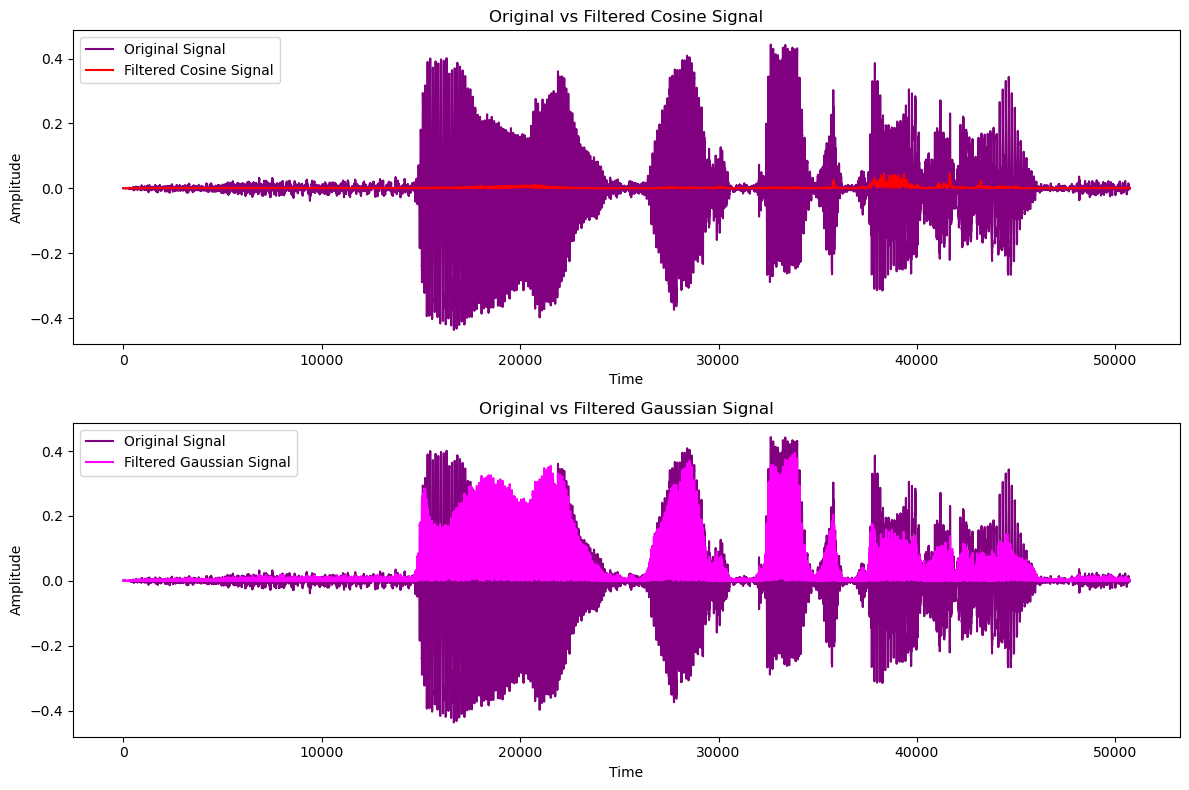

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

input_audio, sample_rate = librosa.load('AI_VOICE.wav')
audio_fft = np.fft.fft(input_audio)
frequency_axis = np.fft.fftfreq(len(audio_fft), 1/sample_rate)


def cosine_filter(freqs, center, band):
    return np.exp(-0.5 * ((freqs - center) / band) ** 2)

def gaussian_filter(freqs, center, std):
    return np.cos(np.pi * (freqs - center) / (2 * std)) ** 2

center_freq = 1000 
bandwidth = 200
std_deviation = 100

cosine_mask = cosine_filter(frequency_axis, center_freq, bandwidth)
gaussian_mask = gaussian_filter(frequency_axis, center_freq, std_deviation)

filtered_cosine_fft = audio_fft * cosine_mask
filtered_gaussian_fft = audio_fft * gaussian_mask

cosine_signal = np.fft.ifft(filtered_cosine_fft)
gaussian_signal = np.fft.ifft(filtered_gaussian_fft)


plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(input_audio, label='Original Signal', color='purple')
plt.plot(np.abs(cosine_signal), label='Filtered Cosine Signal', color='red')
plt.title('Original vs Filtered Cosine Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(input_audio, label='Original Signal', color='purple')
plt.plot(np.abs(gaussian_signal), label='Filtered Gaussian Signal', color='magenta')
plt.title('Original vs Filtered Gaussian Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()